# THE MINI FINITE STATE MACHINE: THE COMPLETE FSM BASED ON THE GRAPH FSMver0 #

**The purpose of this code is to create the complete FSM for the Hanoi Droid Capstone.**

_**Main mission: only to test the modules developed**_

**Acknowledge: all the library makers:**

**https://github.com/pytransitions/transitions**





In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from transitions import Machine
import serial
import speech_recognition as sr

In [2]:
#my custom modules imports
import settingsHD as glb #this import all the global variables
import hanoi_img_procHD as vidpro
import matrix_proc as mtrx
#import statemachine as FSMrobot
import voicerecog as vr

In [3]:
#some global variables
sort_disc_dictionary = {'sort0' : None, 'sort1': None, 'sort2': None}



In [4]:
# this state machine corresponds to all the behaviour of the Hanoi Droid robot, focused on solve the tower of hanoi game.

#from transitions import Machine

class HanoiDroidFSM(object):

    # Define some states. Most of the time, narcoleptic superheroes are just like
    # everyone else. Except for...
    states = ['zero', 'face_track', 'voice_cmd', 'hanoi_game', 'hg_step1', 'hg_step2', 'hg_step3', 'hg_step4', 'hg_step5', 'hg_step6', 'hg_step7', \
              'custom_disc', 'organize_mov','comp_matrix' , 'game_solv', 'prompt_error'  ]
    # A more compact version of the quickstart transitions
    transitions = [{'trigger': 'timer_start_track', 'source': 'zero', 'dest':  'face_track'},
                   {'trigger': 'timer_face_out', 'source': 'face_track', 'dest':  'zero'},
                   {'trigger': 'voice', 'source': 'zero', 'dest':  'voice_cmd', 'before': 'recognize_command'},
                   {'trigger': 'voice', 'source': 'face_track', 'dest':  'voice_cmd'},
                   {'trigger': 'non_voice', 'source': 'voice_cmd', 'dest':  'zero'},
                   {'trigger': 'custom_disc', 'source': 'voice_cmd', 'dest':  'custom_disc'},
                   {'trigger': 'get_mtx', 'source': 'custom_disc', 'dest':  'organize_mov'},
                   {'trigger': 'ack', 'source': 'organize_mov', 'dest':  'comp_matrix'},
                   {'trigger': 'eq_mtx', 'source': 'comp_matrix', 'dest':  'game_solved'},
                   {'trigger': 'dif_mtx', 'source': 'comp_matrix', 'dest':  'prompt_error'},
                   {'trigger': 'solve_hanoi', 'source': 'voice_cmd', 'dest':  'hanoi_game'},
                   {'trigger': 'hg_start', 'source': 'hanoi_game', 'dest':  'hg_step1'},
                   {'trigger': 'ack', 'source': 'hg_step1', 'dest':  'hg_step2'},
                   {'trigger': 'ack', 'source': 'hg_step2', 'dest':  'hg_step3'},
                   {'trigger': 'ack', 'source': 'hg_step3', 'dest':  'hg_step4'},
                   {'trigger': 'ack', 'source': 'hg_step4', 'dest':  'hg_step5'},
                   {'trigger': 'ack', 'source': 'hg_step5', 'dest':  'hg_step6'},
                   {'trigger': 'ack', 'source': 'hg_step6', 'dest':  'hg_step7'},
                   {'trigger': 'dif_mtx', 'source': 'hanoi_game', 'dest':  'prompt_error'},
                   {'trigger': 'dif_mtx', 'source': 'hg_step1', 'dest':  'prompt_error'},
                   {'trigger': 'dif_mtx', 'source': 'hg_step2', 'dest':  'prompt_error'},
                   {'trigger': 'dif_mtx', 'source': 'hg_step3', 'dest':  'prompt_error'},
                   {'trigger': 'dif_mtx', 'source': 'hg_step4', 'dest':  'prompt_error'},
                   {'trigger': 'dif_mtx', 'source': 'hg_step5', 'dest':  'prompt_error'},
                   {'trigger': 'dif_mtx', 'source': 'hg_step6', 'dest':  'prompt_error'},
                   {'trigger': 'dif_mtx', 'source': 'hg_step7', 'dest':  'prompt_error'},
                   {'trigger': 'ack', 'source': 'hg_step7', 'dest':  'game_solved'},
                   {'trigger': 'timer_show', 'source': 'game_solved', 'dest':  'zero'},
                   {'trigger': 'timer_show', 'source': 'prompt_error', 'dest':  'zero'}]
    
    
    
    def __init__(self, name):

        self.name = name
        #self.kittens_rescued = 0  # What have we accomplished today?
        self.command = 'none'
       
        # Initialize the state machine
        self.machine = Machine(model=self, states=HanoiDroidFSM.states,
                               transitions=HanoiDroidFSM.transitions, initial='zero')
    
    def recognize_command(self):
        print("I am in Voice state")
        
        
        
        

In [14]:
#create the state machine object

#droid = FSMrobot.HanoiDroidFSM("Droid") remove comment for final
droid = HanoiDroidFSM("Droid")



In [15]:
while droid.state == 'zero':
    print ("inside zero state")
    have_a_command, command = vr.start_robot_voice_command()
    if have_a_command:
        droid.voice()
        break


inside zero state
Listening for 'robot start' command...
result2:
{   'alternative': [   {'confidence': 0.88766098, 'transcript': 'start'},
                       {'confidence': 0.88766098, 'transcript': 'starte'},
                       {'confidence': 0.88766104, 'transcript': 'stheart'},
                       {'confidence': 0.88766098, 'transcript': 'startt'},
                       {'confidence': 0.88766104, 'transcript': 'staart'}],
    'final': True}
I am in Voice state


In [16]:
if droid.state == 'voice_cmd':
    if "start" in command:
        print("Starting the hanoi solving...")
        droid.solve_hanoi()
    else:
        print("command not in my instructions")
        droid.non_voice()

Starting the hanoi solving...


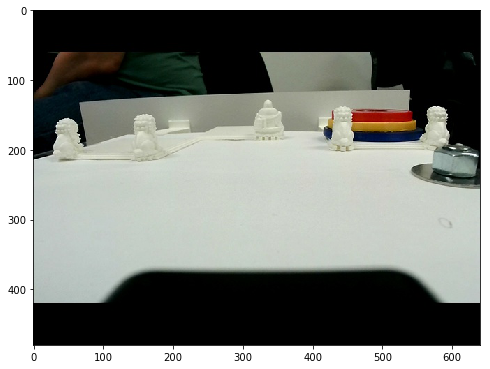

In [17]:
####------------DELETE THIS FOR THE FINAL IMPLEMENTATION----------------------------
# load the dictionary with the jpg dataset stored at DATA


def display(img, cmap='gray'):
    fig = plt.figure(figsize = (8,9))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')
    
    

hanoi_dict = {} #dictionary used to store the images
img_quant = 21  #number of samples pictures


for i in range (1, (img_quant+1)):

    
    #note: the files from 18 nov are the ones without the withe background
    #name_file = 'DATA/CamosunTest/hanoinov18sample (' + str(i) + ').jpg'
    name_file = 'DATA/CamosunTest/hanoinov24sample (' + str(i) + ').jpg'
    name_var = str('hanoi'+str(i))
    
    hanoi_dict[name_var] = cv2.imread(name_file)

#load the image that I want to know the HSV value, but first look in the RGB version and also get the HSV version

img = hanoi_dict['hanoi2']
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imagehsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
imagecopy = image.copy()
imagehsvcopy = imagehsv.copy()
display(image)

small_image_hsv = imagehsvcopy[130:230, 0:630]



#####------DELETE UP !!!!!-----

In [23]:
print(image.shape)

(480, 640, 3)


inside hanoi_game state


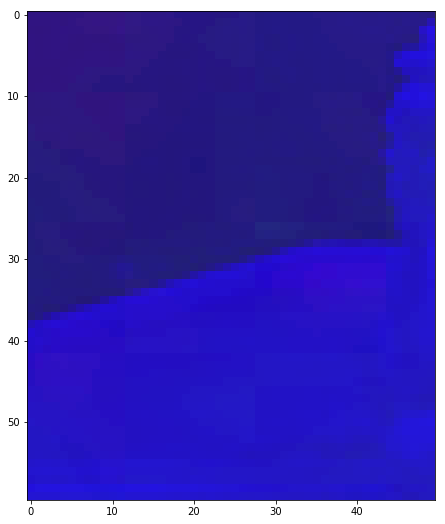

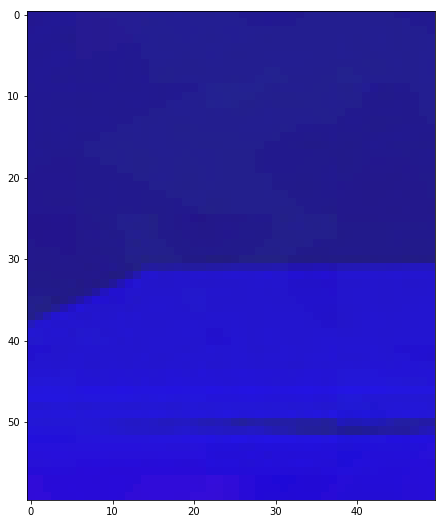

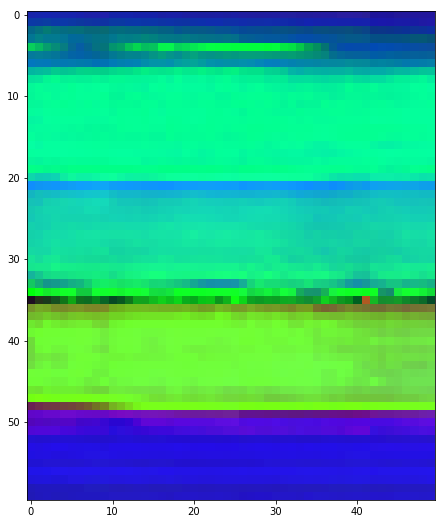

In [18]:
if droid.state == 'hanoi_game':
    print ("inside hanoi_game state")
    
    #--------- UNCOMMENT FOR FINAL APPLICATION
    #frame = vidpro.take_one_frame() #this is to take the picture of the outside. I should compare to the inital state
    #small_image_hsv = vidpro.convert_and_crop(frame)
    
    for i in range(0, 3):
        imagehsv_roi = small_image_hsv[glb.mask_y_position_dict['y'+str(i)]:(glb.mask_y_position_dict['y'+str(i)] + glb.mask_height), int(glb.mask_x_position_dict['x'+str(i)]):int(glb.mask_x_position_dict['x'+str(i)]+glb.mask_width)]
        display(imagehsv_roi)
        sort_disc_dictionary['sort' + str(i)] = vidpro.detect_color(imagehsv_roi) 
    
    state = 0
    hanoi_mat= glb.hanoi_matrix_char[(3*state):(3*(state+1)), :] #this is the theorical correct matrix
    detected_matrix_char = mtrx.get_detected_matrix_char(sort_disc_dictionary) #this is the matrix detected by the camera
    flip_detected_matrix_char = np.fliplr(detected_matrix_char) #need to flip to adjust user/robot perspective
    matrices_are_equal = (flip_detected_matrix_char == hanoi_mat).all()
        
    if matrices_are_equal: #if the matrices are equal, continues next state, if not, go to prompt error
        droid.hg_start()
    else:
        droid.dif_mtx()
            
    

In [19]:
droid.state

'hg_step1'

In [20]:
flip_detected_matrix_char

array([['R', '0', '0'],
       ['Y', '0', '0'],
       ['B', '0', '0']], dtype='<U1')

In [21]:
 hanoi_mat

array([['R', '0', '0'],
       ['Y', '0', '0'],
       ['B', '0', '0']], dtype='<U1')

In [22]:
matrices_are_equal

True